In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV # 通过网格方式来搜索参数
from sklearn.tree import DecisionTreeClassifier as dtc
import matplotlib.pyplot as plt # 可视化
from matplotlib import rcParams # 图大小
from sklearn.tree import plot_tree # 树图

In [2]:
#如果出现中文绘图乱码则使用下面这段代码
#from matplotlib import *
#font = {
#    'family':'SimHei',
#    'weight':'bold',
#    'size':12
#}
#matplotlib.rc("font", **font)


In [3]:
data = pd.read_csv("class_weathering_chemical.csv")#导入数据集
features = data.columns[1:15]
X = data[features]#设置待估Xy
y = data[data.columns[15:17]]
#X.set_index("文物编号",inplace=True)#更改索引
#features = ["纹饰","类型","颜色"]

In [4]:

# 设置需要搜索的参数值，在这里寻找最优的决策树深度
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
model = dtc()  # 注意：在这里不用指定参数
# GridSearchCV
clf = GridSearchCV(model, parameters, cv=5)   
clf.fit(X, y)
# 输出最好的参数以及对应的准确率
print ("best score is: %.4f"%clf.best_score_, "  best param: ",clf.best_params_,)


best score is: 1.0000   best param:  {'max_depth': 1}


In [5]:
model = dtc(max_depth=3,criterion = 'entropy')#一层无法可视化,于是构建两层
model = model.fit(X, y)

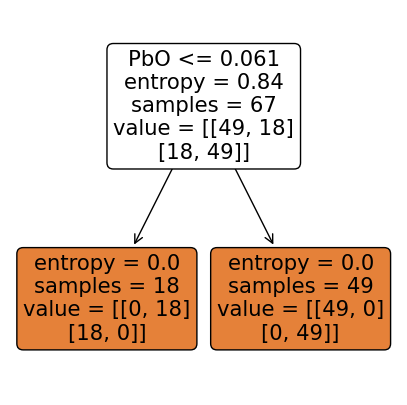

In [6]:
rcParams['figure.figsize'] = (5, 5)
target_names = ['rich_k','PbBa']
from sklearn.tree import plot_tree # 树图
plot_tree(
    model, 
    feature_names = features,  
    class_names= target_names,
    filled=True,
    rounded = True
)
plt.savefig('如何划分铅钡和高钾.png')
